#### Exercise 1
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [67]:
import pandas as pd
data = pd.read_csv("data/2019_Yellow_Taxi_Trip_Data.csv")
summary = data.describe()
data[["fare_amount", "tip_amount", "tolls_amount", "total_amount"]].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 2
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [68]:
long = data["trip_distance"].idxmax()
long_trip = data.loc[long, :]

long_trip

long_trip[["fare_amount", "tip_amount", "tolls_amount", "total_amount"]]

fare_amount      176.0
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: object

#### Exercise 3
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [69]:
data2 = pd.read_csv("data/Meteorite_Landings.csv")
data2.head()

data2 = data2.rename(columns= {"mass (g)": "mass"})
data2.head()

data2.drop(columns = ["reclat", "reclong"], inplace = True)
data2.head()

,name,id,nametype,recclass,mass,fall,year,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,"(-33.16667, -64.95)"


#### Exercise 4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [70]:
data2["year"] = pd.to_datetime(data2["year"], errors = "coerce")
data2.head()
data2["year"] = data2["year"].dt.year
data2.head()
data2["Observed before 1970"] = (data2["year"] < 1970).astype(int) 
data2.head()

C:\Users\dpang\AppData\Local\Temp\ipykernel_27140\836141.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2["year"] = pd.to_datetime(data2["year"], errors = "coerce")


,name,id,nametype,recclass,mass,fall,year,GeoLocation,Observed before 1970
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,"(50.775, 6.08333)",1
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,"(56.18333, 10.23333)",1
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,"(54.21667, -113.0)",1
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,"(16.88333, -99.9)",0
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,"(-33.16667, -64.95)",1


#### Exercise 5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [71]:
data["tpep_dropoff_datetime"] = pd.to_datetime(data["tpep_dropoff_datetime"], errors = "coerce")
data.head()
data.set_index("tpep_dropoff_datetime", inplace = True)
hourly = data.resample("H").agg({"trip_distance": "sum", "total_amount": "sum", 
                                 "passenger_count": "sum", "tip_amount": "sum"})

hourly.head()
hourly.nlargest(5, "trip_distance")

C:\Users\dpang\AppData\Local\Temp\ipykernel_27140\3150511394.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = data.resample("H").agg({"trip_distance": "sum", "total_amount": "sum",


,trip_distance,total_amount,passenger_count,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 17:00:00,16052.83,100206.13,4824,12044.03
2019-10-23 16:00:00,10676.95,106640.79,9473,12228.64
2019-10-23 18:00:00,3104.56,16747.92,548,1907.64
2019-10-23 19:00:00,98.59,352.22,9,25.74
2019-10-24 15:00:00,54.61,295.47,7,23.35


#### Exercise 6
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

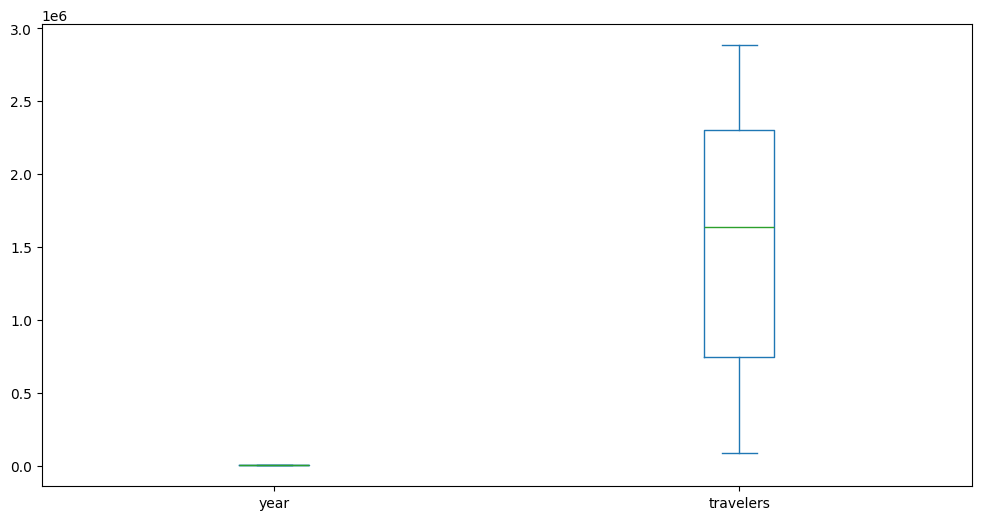

In [72]:
import matplotlib.pyplot as plt

data3 = pd.read_csv("data/tsa_melted_holiday_travel.csv")

data3.head()

data3.plot(kind = "box", figsize=(12, 6))

plt.show()

#### Exercise 7
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

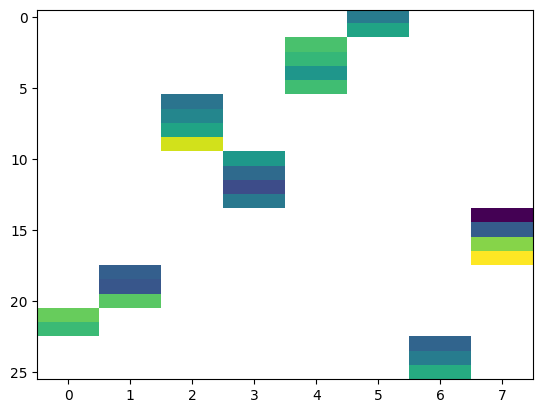

In [73]:
data4 = pd.read_csv("data/tsa_melted_holiday_travel.csv")

data4_2019 = data4[data4["year"] == 2019]
data4_2019.head()

pt = data4_2019.pivot_table(index = "date", columns = "holiday", values = "travelers")
plt.imshow(pt, aspect = "auto")
plt.show()